### Problem Statement 

The project checks the factors affecting the Air Quality is affected by the factors like pm25, pm10, o3, n02, co etc. 

### Data Collection 

#### Installing the Library for generating the Data 

In [5]:
pip install faker 


Note: you may need to restart the kernel to use updated packages.


#### Generating the synthetic data  and saving the folder 

In [6]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta


fake = Faker()


states = [
    {"state": "Alabama", "city": "Montgomery", "lat": 32.3777, "lon": -86.3000},
    {"state": "Alaska", "city": "Juneau", "lat": 58.3019, "lon": -134.4197},
    {"state": "Arizona", "city": "Phoenix", "lat": 33.4484, "lon": -112.0740},
    {"state": "Arkansas", "city": "Little Rock", "lat": 34.7465, "lon": -92.2896},
    {"state": "California", "city": "Sacramento", "lat": 38.5816, "lon": -121.4944},
    {"state": "Colorado", "city": "Denver", "lat": 39.7392, "lon": -104.9903},
    {"state": "Connecticut", "city": "Hartford", "lat": 41.7658, "lon": -72.6734},
    {"state": "Delaware", "city": "Dover", "lat": 39.1582, "lon": -75.5244},
    {"state": "Florida", "city": "Tallahassee", "lat": 30.4383, "lon": -84.2807},
    {"state": "Georgia", "city": "Atlanta", "lat": 33.7490, "lon": -84.3880},
    {"state": "Hawaii", "city": "Honolulu", "lat": 21.3069, "lon": -157.8583},
    {"state": "Idaho", "city": "Boise", "lat": 43.6150, "lon": -116.2023},
    {"state": "Illinois", "city": "Springfield", "lat": 39.7817, "lon": -89.6501},
    {"state": "Indiana", "city": "Indianapolis", "lat": 39.7684, "lon": -86.1581},
    {"state": "Iowa", "city": "Des Moines", "lat": 41.5868, "lon": -93.6250},
    {"state": "Kansas", "city": "Topeka", "lat": 39.0489, "lon": -95.6779},
    {"state": "Kentucky", "city": "Frankfort", "lat": 38.2009, "lon": -84.8733},
    {"state": "Louisiana", "city": "Baton Rouge", "lat": 30.4515, "lon": -91.1871},
    {"state": "Maine", "city": "Augusta", "lat": 44.3106, "lon": -69.7795},
    {"state": "Maryland", "city": "Annapolis", "lat": 38.9784, "lon": -76.4922},
    {"state": "Massachusetts", "city": "Boston", "lat": 42.3601, "lon": -71.0589},
    {"state": "Michigan", "city": "Lansing", "lat": 42.7325, "lon": -84.5555},
    {"state": "Minnesota", "city": "Saint Paul", "lat": 44.9537, "lon": -93.0900},
    {"state": "Mississippi", "city": "Jackson", "lat": 32.2988, "lon": -90.1848},
    {"state": "Missouri", "city": "Jefferson City", "lat": 38.5767, "lon": -92.1735},
    {"state": "Montana", "city": "Helena", "lat": 46.5891, "lon": -112.0391},
    {"state": "Nebraska", "city": "Lincoln", "lat": 40.8136, "lon": -96.7026},
    {"state": "Nevada", "city": "Carson City", "lat": 39.1638, "lon": -119.7674},
    {"state": "New Hampshire", "city": "Concord", "lat": 43.2081, "lon": -71.5376},
    {"state": "New Jersey", "city": "Trenton", "lat": 40.2206, "lon": -74.7597},
    {"state": "New Mexico", "city": "Santa Fe", "lat": 35.6870, "lon": -105.9378},
    {"state": "New York", "city": "Albany", "lat": 42.6526, "lon": -73.7562},
    {"state": "North Carolina", "city": "Raleigh", "lat": 35.7796, "lon": -78.6382},
    {"state": "North Dakota", "city": "Bismarck", "lat": 46.8083, "lon": -100.7837},
    {"state": "Ohio", "city": "Columbus", "lat": 39.9612, "lon": -82.9988},
    {"state": "Oklahoma", "city": "Oklahoma City", "lat": 35.4676, "lon": -97.5164},
    {"state": "Oregon", "city": "Salem", "lat": 44.9429, "lon": -123.0351},
    {"state": "Pennsylvania", "city": "Harrisburg", "lat": 40.2732, "lon": -76.8867},
    {"state": "Rhode Island", "city": "Providence", "lat": 41.8240, "lon": -71.4128},
    {"state": "South Carolina", "city": "Columbia", "lat": 34.0007, "lon": -81.0348},
    {"state": "South Dakota", "city": "Pierre", "lat": 44.3683, "lon": -100.3510},
    {"state": "Tennessee", "city": "Nashville", "lat": 36.1627, "lon": -86.7816},
    {"state": "Texas", "city": "Austin", "lat": 30.2672, "lon": -97.7431},
    {"state": "Utah", "city": "Salt Lake City", "lat": 40.7608, "lon": -111.8910},
    {"state": "Vermont", "city": "Montpelier", "lat": 44.2601, "lon": -72.5754},
    {"state": "Virginia", "city": "Richmond", "lat": 37.5407, "lon": -77.4360},
    {"state": "Washington", "city": "Olympia", "lat": 47.0379, "lon": -122.9007},
    {"state": "West Virginia", "city": "Charleston", "lat": 38.3498, "lon": -81.6326},
    {"state": "Wisconsin", "city": "Madison", "lat": 43.0731, "lon": -89.4012},
    {"state": "Wyoming", "city": "Cheyenne", "lat": 41.1400, "lon": -104.8202},
    {"state": "District of Columbia", "city": "Washington", "lat": 38.9072, "lon": -77.0369}
]

start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 12, 31)


date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Function to simulate pollutant values with some seasonal variation
def seasonal_value(base, variation, month):
    seasonal_factor = 1 + 0.2 * np.sin((month - 1) / 12 * 2 * np.pi)  # seasonal cycle
    return round(np.clip(base * seasonal_factor + random.uniform(-variation, variation), 0, None), 2)


records = []

for city in states:
    for date in date_range:
        month = date.month
        
   
        pm25 = seasonal_value(12, 5, month)
        pm10 = seasonal_value(25, 10, month)
        o3 = seasonal_value(30, 12, month)
        no2 = seasonal_value(20, 8, month)
        so2 = seasonal_value(5, 2, month)
        co = seasonal_value(0.5, 0.2, month)
        
        
       
        aqi = max(
            pm25 * 2,         # PM2.5 has strongest impact
            pm10 * 0.8,       # PM10 contributes, but less
            o3 * 1.5,         # Ozone also has strong effect
            no2 * 1.2         # NO2 moderate effect
        )

        
        aqi += random.uniform(-10, 10)

        
        if random.random() < 0.02:  # 2% chance of spike
            aqi += random.randint(50, 200)

        
        aqi = int(np.clip(aqi, 0, 500))
        
       
        temp = seasonal_value(15, 10, month)  # °C
        humidity = round(random.uniform(30, 90), 1)  # %
        wind_speed = round(random.uniform(0.5, 10), 1)  # m/s
        
        records.append({
            "date": date.strftime("%Y-%m-%d"),
            "city": city["city"],
            "latitude": city["lat"],
            "longitude": city["lon"],
            "pm25": pm25,
            "pm10": pm10,
            "o3": o3,
            "no2": no2,
            "so2": so2,
            "co": co,
            "aqi": aqi,
            "temperature_c": temp,
            "humidity_percent": humidity,
            "wind_speed_mps": wind_speed,
            "month": month,
            "day": date.day
        })


df = pd.DataFrame(records)

print(f"Dataset generated: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()



Dataset generated: 93126 rows, 16 columns


date        city  latitude  longitude   pm25   pm10     o3    no2  \
0  2019-01-01  Montgomery   32.3777      -86.3  13.24  19.06  27.54  22.10   
1  2019-01-02  Montgomery   32.3777      -86.3  14.43  16.52  38.57  14.75   
2  2019-01-03  Montgomery   32.3777      -86.3  12.71  26.04  21.35  19.34   
3  2019-01-04  Montgomery   32.3777      -86.3  16.27  30.00  28.41  14.57   
4  2019-01-05  Montgomery   32.3777      -86.3   9.98  25.57  24.57  17.69   

    so2    co  aqi  temperature_c  humidity_percent  wind_speed_mps  month  \
0  5.40  0.62   46          23.16              85.5             6.2      1   
1  5.69  0.51   49          13.60              56.3             9.9      1   
2  3.22  0.70   30          15.58              58.9             0.7      1   
3  4.56  0.45   50          22.96              57.0             8.7      1   
4  6.38  0.59   33          22.63              90.0             6.3      1   

   day  
0    1  
1    2  
2    3  
3    4  
4    5

#### Importing the necessary libraries 

In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

#### Shape of the dataset

In [9]:
df.shape

(93126, 16)

Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### Check Missing values

In [10]:
df.isna().sum()

date                0
city                0
latitude            0
longitude           0
pm25                0
pm10                0
o3                  0
no2                 0
so2                 0
co                  0
aqi                 0
temperature_c       0
humidity_percent    0
wind_speed_mps      0
month               0
day                 0
dtype: int64

There are no missing values in the data set

#### Check Duplicates 

In [11]:
df.duplicated().sum()

np.int64(0)

There are no duplicates  values in the data set

#### Check data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93126 entries, 0 to 93125
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              93126 non-null  object 
 1   city              93126 non-null  object 
 2   latitude          93126 non-null  float64
 3   longitude         93126 non-null  float64
 4   pm25              93126 non-null  float64
 5   pm10              93126 non-null  float64
 6   o3                93126 non-null  float64
 7   no2               93126 non-null  float64
 8   so2               93126 non-null  float64
 9   co                93126 non-null  float64
 10  aqi               93126 non-null  int64  
 11  temperature_c     93126 non-null  float64
 12  humidity_percent  93126 non-null  float64
 13  wind_speed_mps    93126 non-null  float64
 14  month             93126 non-null  int64  
 15  day               93126 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

#### Checking the number of unique values of each column

In [13]:
df.nunique()

date                1826
city                  51
latitude              51
longitude             51
pm25                1480
pm10                3001
o3                  3594
no2                 2398
so2                  601
co                    61
aqi                  255
temperature_c       2600
humidity_percent     601
wind_speed_mps        96
month                 12
day                   31
dtype: int64

#### Check statistics of data set

In [14]:
df.describe()

latitude     longitude          pm25          pm10            o3  \
count  93126.000000  93126.000000  93126.000000  93126.000000  93126.000000   
mean      39.402698    -93.144659     11.993965     24.991150     29.989838   
std        5.614362     18.441989      3.354224      6.772134      8.127509   
min       21.306900   -157.858300      4.610000     10.000000     12.000000   
25%       35.779600   -104.820200      9.480000     20.000000     23.990000   
50%       39.768400    -89.650100     12.000000     25.010000     29.980000   
75%       42.732500    -77.436000     14.500000     30.030000     36.000000   
max       58.301900    -69.779500     19.400000     40.000000     47.990000   

                no2           so2            co           aqi  temperature_c  \
count  93126.000000  93126.000000  93126.000000  93126.000000   93126.000000   
mean      20.009403      4.999029      0.499846     47.337521      14.981020   
std        5.409190      1.352025      0.135317     23.217730       6.168529   
min        8.010000      2.000000      0.200000      9.000000       2.000000   
25%       16.020000      4.000000      0.400000     35.000000       9.950000   
50%       20.020000      5.000000      0.500000     45.000000      14.960000   
75%       23.990000      5.990000      0.600000     55.000000      19.990000   
max       32.000000      8.000000      0.800000    266.000000      27.990000   

       humidity_percent  wind_speed_mps         month           day  
count      93126.000000    93126.000000  93126.000000  93126.000000  
mean          59.941254        5.250572      6.523549     15.727820  
std           17.267903        2.743461      3.448552      8.799372  
min           30.000000        0.500000      1.000000      1.000000  
25%           45.000000        2.900000      4.000000      8.000000  
50%           60.000000        5.200000      7.000000     16.000000  
75%           74.800000        7.600000     10.000000     23.000000  
max           90.000000       10.000000     12.000000     31.000000

### Feature Engineering 

In [15]:
def extract_datetime_features(df, date_column):
  
    df = df.copy()
    df[date_column] = pd.to_datetime(df[date_column])
    
    df['year'] = df[date_column].dt.year
    df['month'] = df[date_column].dt.month
    df['day'] = df[date_column].dt.day
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['hour'] = df[date_column].dt.hour
    df['is_weekend'] = (df[date_column].dt.dayofweek >= 5).astype(int)
    df['day_of_year'] = df[date_column].dt.dayofyear
    
    # Season mapping
    season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
                  5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
    df['season'] = df['month'].map(season_map)
    
    return df

In [16]:
final_df = extract_datetime_features(df, 'date')

### Exploring Data

#### AQI trend over the time 

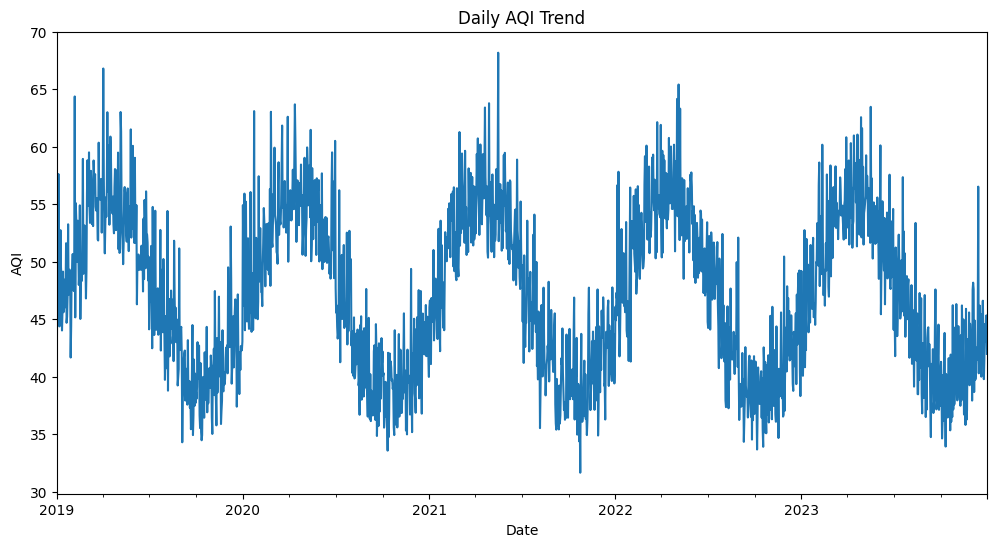

In [17]:
daily_trend = final_df .groupby("date")["aqi"].mean()
plt.figure(figsize=(12,6))
daily_trend.plot()
plt.title("Daily AQI Trend")
plt.ylabel("AQI")
plt.xlabel("Date")
plt.show()

#### Seasonal Trend by Month Wise 

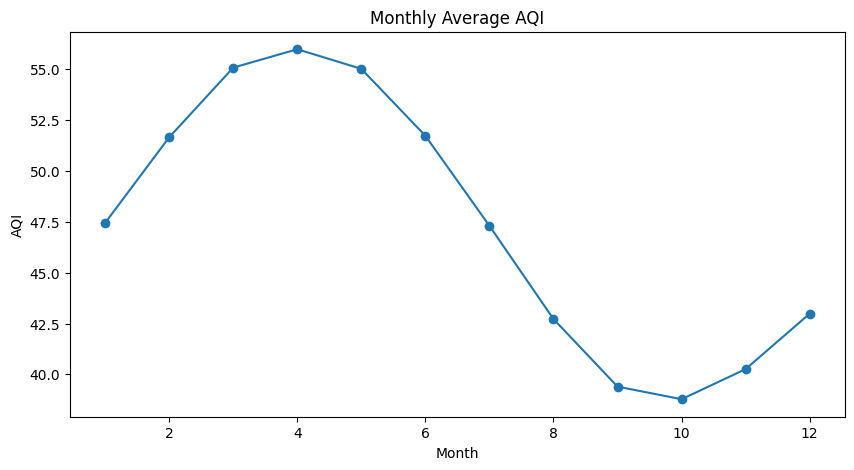

In [18]:
monthly_trend = final_df.groupby("month")["aqi"].mean()
plt.figure(figsize=(10,5))
monthly_trend.plot(marker="o")
plt.title("Monthly Average AQI")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.show()

#### City Wise AQI

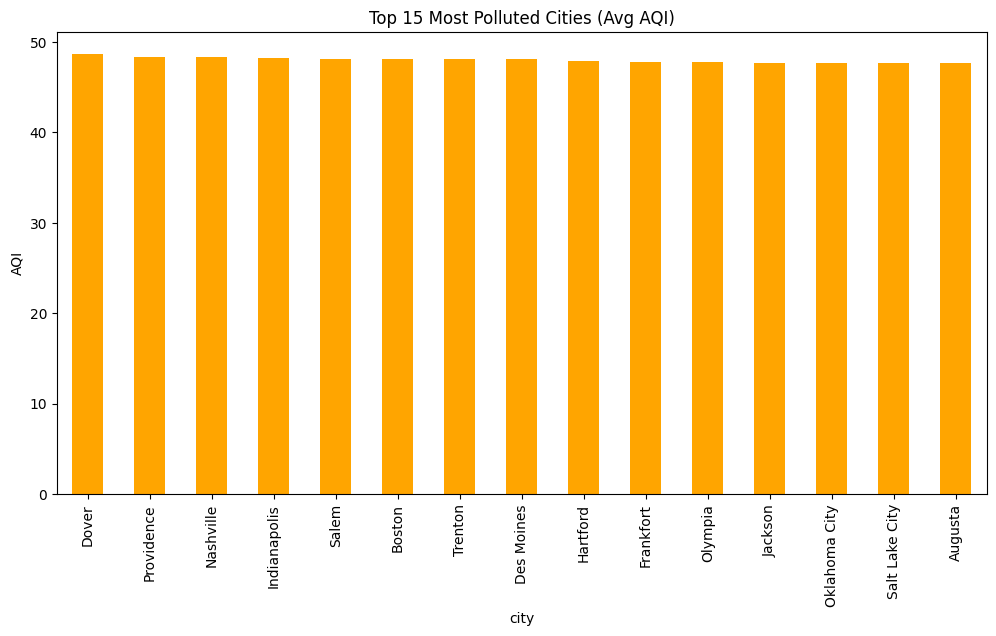

In [19]:
city_aqi = df.groupby("city")["aqi"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
city_aqi.head(15).plot(kind="bar", color="orange")
plt.title("Top 15 Most Polluted Cities (Avg AQI)")
plt.ylabel("AQI")
plt.show()

#### Pollutants vs AQI Correlation Matrix

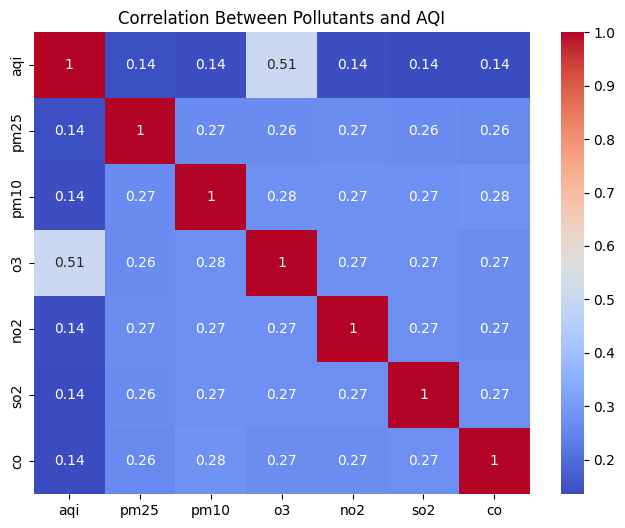

In [20]:
pollutants = ["pm25", "pm10", "o3", "no2", "so2", "co"]
plt.figure(figsize=(8,6))
sns.heatmap(final_df[["aqi"] + pollutants].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants and AQI")
plt.show()

In [21]:
final_df.columns

Index(['date', 'city', 'latitude', 'longitude', 'pm25', 'pm10', 'o3', 'no2',
       'so2', 'co', 'aqi', 'temperature_c', 'humidity_percent',
       'wind_speed_mps', 'month', 'day', 'year', 'day_of_week', 'hour',
       'is_weekend', 'day_of_year', 'season'],
      dtype='object')

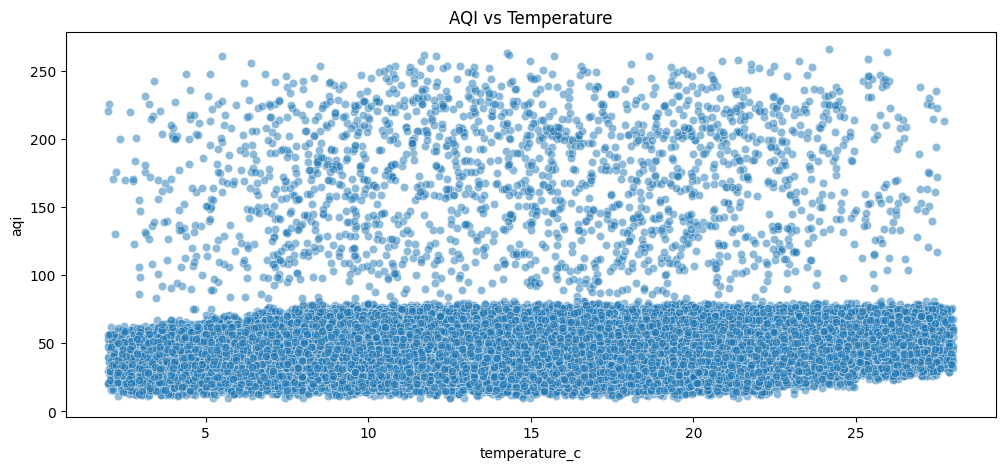

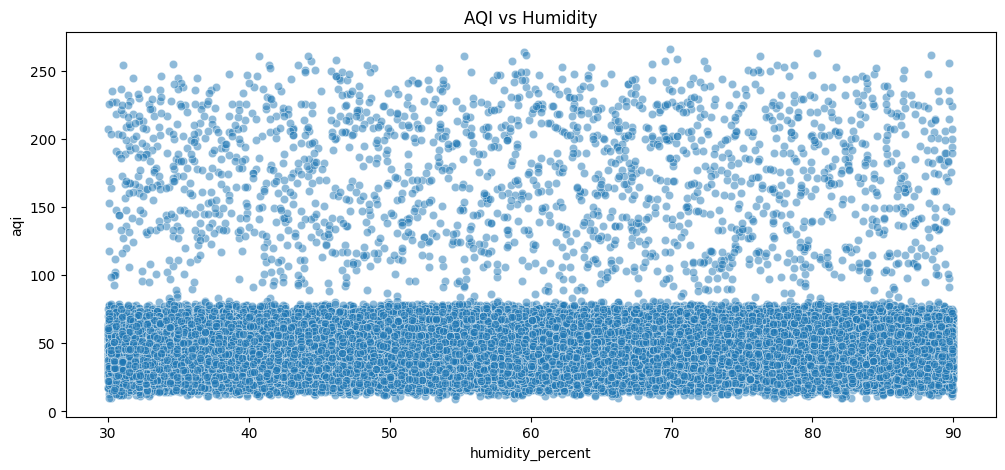

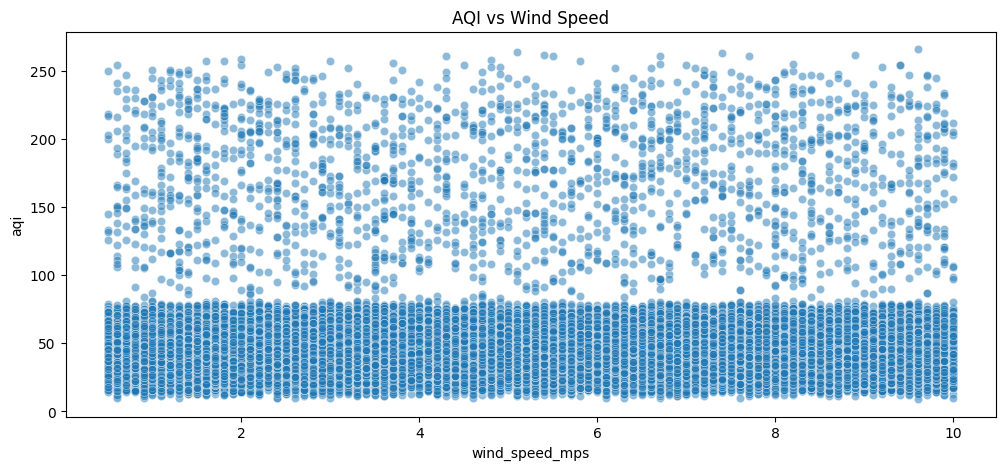

In [22]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="temperature_c", y="aqi", data=final_df, alpha=0.5)
plt.title("AQI vs Temperature")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x="humidity_percent", y="aqi", data=final_df, alpha=0.5)
plt.title("AQI vs Humidity")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x="wind_speed_mps", y="aqi", data=final_df, alpha=0.5)
plt.title("AQI vs Wind Speed")
plt.show()

#### AQI Categories (EPA Standard)

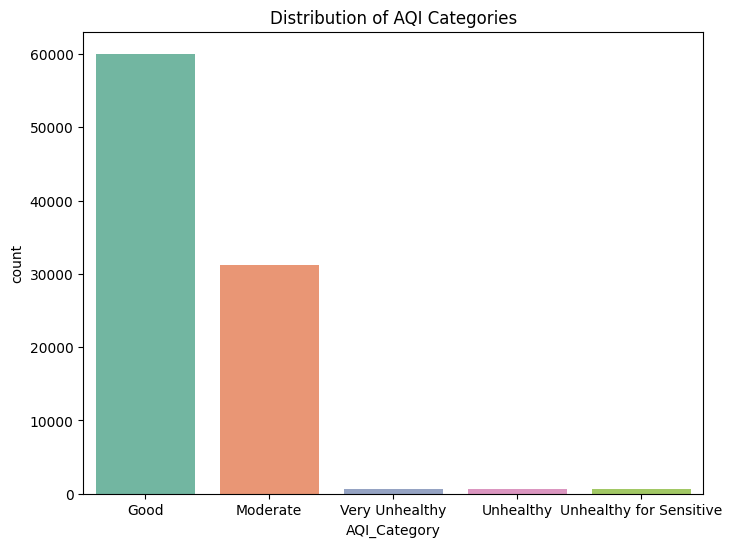

In [23]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Apply categorization
final_df["AQI_Category"] = final_df["aqi"].apply(categorize_aqi)

plt.figure(figsize=(8,6))
sns.countplot(x="AQI_Category", data=final_df, order=final_df["AQI_Category"].value_counts().index, palette="Set2")
plt.title("Distribution of AQI Categories")
plt.show()

#### Geospatial Analysis (Map)

In [26]:
fig = px.scatter_geo(
    final_df,
    lat="latitude", lon="longitude",
    color="aqi", size="aqi",
    hover_name="city",
    animation_frame=final_df["date"].dt.year.astype(str),
    title="Air Quality Across US Cities"
)
fig.show()

In [27]:
final_df.to_csv("Air_Quality_Data.csv", index=False)